In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
sns.set()

In [4]:
# data - 
url = "https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/53%20DataSet/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


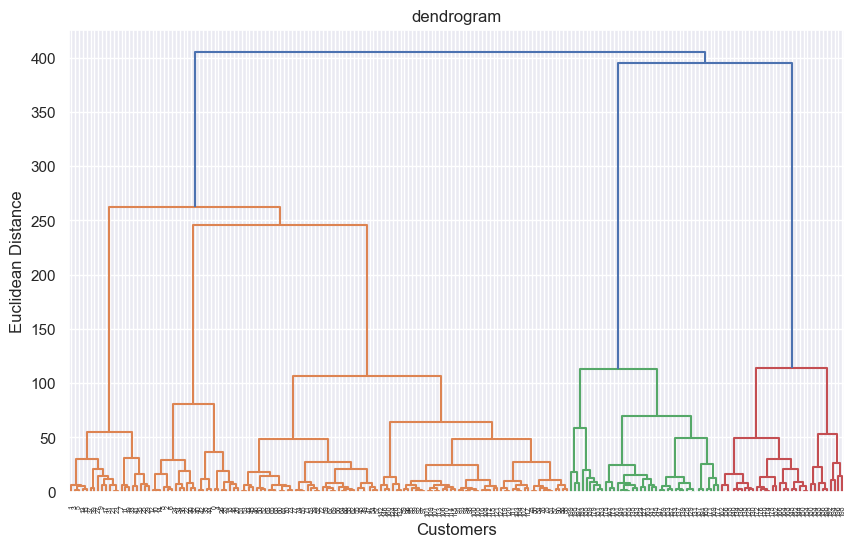

In [6]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
# dendrogram
plt.figure(figsize=(10,6))
linkage_matrix = linkage(X,method="ward")
dendrogram(linkage_matrix)
plt.title("dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [23]:
# Apply Agglomerative Clustering
hier_cluster = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)
labels = hier_cluster.fit_predict(X)
df["Cluster"] = labels

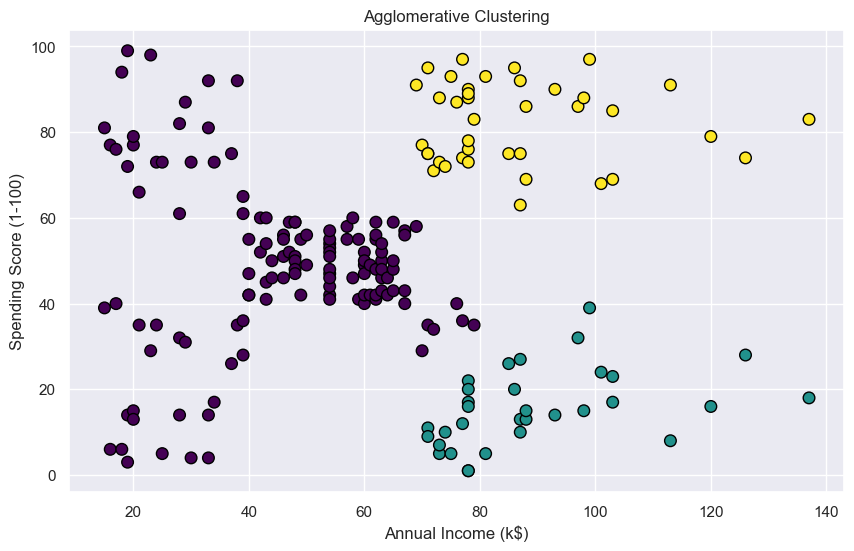

Cluster
0    129
2     39
1     32
Name: count, dtype: int64


In [25]:
plt.figure(figsize=(10,6))
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
    cmap="viridis",
    s=70,
    edgecolor="black"
)
plt.title("Agglomerative Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
print(df["Cluster"].value_counts())

Dataset Loaded Successfully!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Explained Variance Ratio: [0.72962445 0.22850762]


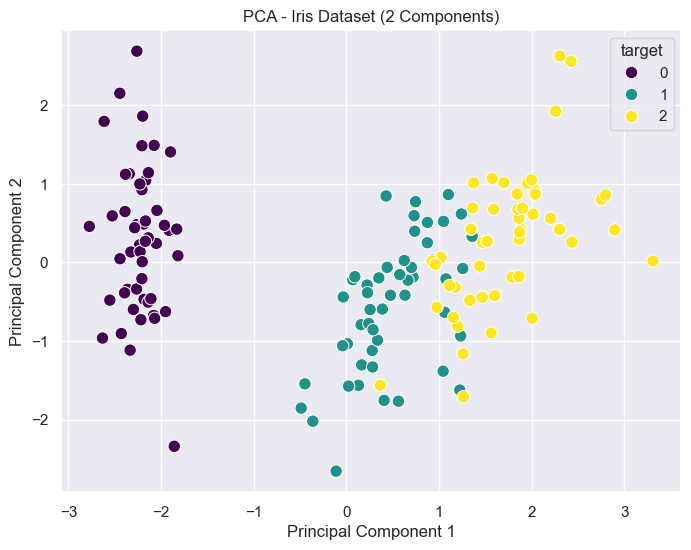

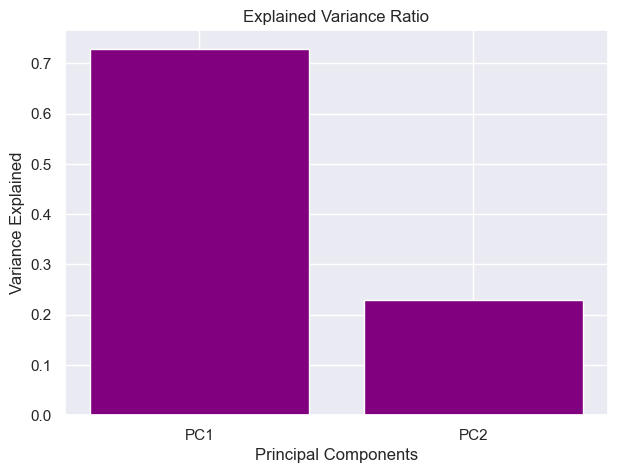

In [26]:
# -----------------------------------
# 1) Import Libraries
# -----------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

sns.set()

# -----------------------------------
# 2) Load Dataset
# -----------------------------------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

print("Dataset Loaded Successfully!")
print(df.head())

# -----------------------------------
# 3) Separate Features and Target
# -----------------------------------
X = df.drop("target", axis=1)
y = df["target"]

# -----------------------------------
# 4) Standardize the Data
# -----------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------
# 5) Apply PCA (Reduce to 2 Components)
# -----------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Convert to DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["target"] = y

# -----------------------------------
# 6) Plot PCA Result
# -----------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="target",
    palette="viridis",
    s=80
)

plt.title("PCA - Iris Dataset (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# -----------------------------------
# 7) Plot Explained Variance
# -----------------------------------
plt.figure(figsize=(7,5))
plt.bar(["PC1", "PC2"], pca.explained_variance_ratio_, color="purple")
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.show()
